In [2]:
import random
from statistics import mean
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

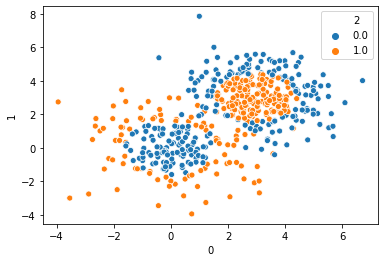

In [3]:
data = pd.read_csv('../datafiles/demo_data/3.concertriccir2.csv',header=None)
sns.scatterplot(x=0,y=1,hue=2,data=data)

In [4]:
data

,0,1,2
0,0.700335,-0.247068,0.0
1,-3.950019,2.740080,1.0
2,0.150222,-2.157638,1.0
3,-1.672050,-0.941519,1.0
4,2.560483,-1.846577,1.0
...,...,...,...
495,2.177895,2.984489,1.0
496,1.778905,2.869205,1.0
497,0.894180,3.069959,0.0
498,0.849439,3.875435,0.0


In [7]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,0:2],data.iloc[:,2],test_size=0.3)
score = list()
for i in range(2,30,2):
    
    sim_neigh = KNeighborsClassifier(n_neighbors=i)
    sim_neigh.fit(X_train,y_train)
    score.append(sim_neigh.score(X_test,y_test))
score

[0.8733333333333333,
 0.8466666666666667,
 0.8466666666666667,
 0.8533333333333334,
 0.88,
 0.8866666666666667,
 0.88,
 0.8666666666666667,
 0.86,
 0.8733333333333333,
 0.8666666666666667,
 0.84,
 0.82,
 0.82]

In [5]:
score2 = list()
for i in range(1,30,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    acc = accuracy_score(y_test, pred, normalize=True) * float(100)
    score2.append(accuracy_score(y_test, pred, normalize=True))
    print('\n CV Accuracy for k = %d is %d %%' %(i,acc))


 CV Accuracy for k = 1 is 92 %

 CV Accuracy for k = 3 is 90 %

 CV Accuracy for k = 5 is 89 %

 CV Accuracy for k = 7 is 90 %

 CV Accuracy for k = 9 is 92 %

 CV Accuracy for k = 11 is 90 %

 CV Accuracy for k = 13 is 88 %

 CV Accuracy for k = 15 is 88 %

 CV Accuracy for k = 17 is 88 %

 CV Accuracy for k = 19 is 87 %

 CV Accuracy for k = 21 is 88 %

 CV Accuracy for k = 23 is 86 %

 CV Accuracy for k = 25 is 85 %

 CV Accuracy for k = 27 is 85 %

 CV Accuracy for k = 29 is 83 %


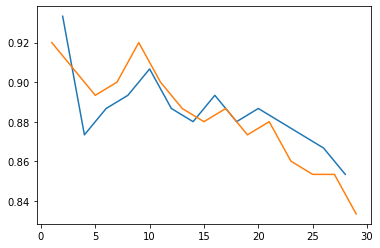

In [6]:
sns.lineplot(y=score,x=range(2,30,2))
sns.lineplot(y=score2,x=range(1,30,2))

- The above shows the Test accuracy , as it is na toy set it shows an overall decreasing graph
- But in real world it is some what like downward facing parabola

### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
- ### Visualising The decision boundary of K-NN

In [18]:
def knn_comparision(data, n_neighbors = 15):
    x = data[:, :2]
    y = data[:, 2]
    h= 0.02
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000','#0000FF'])
    clf = KNeighborsClassifier(n_neighbors)
    clf.fit(x,y)
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min ,y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, z, cmap='spring') # just a little fun here , for normal use 'cmap_light'
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title('K value = '+str(n_neighbors))
    plt.show()

## Implementing the ramdomsearch cv knn

In [86]:
def randomCVfrmScratch(data,fold=10):
    X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,0:2],data.iloc[:,2],test_size=0.3)
    indx = list(X_train.index)
    random.shuffle(indx)                       # this is one type of execution, for second type there are same two line of code in j loop
    split = [indx[i::fold] for i in range(fold)]    
    cv_scores = dict()
    train_scores = dict()
    scrs = list()
    for i in range(1,150,5):  
        cv_fold_score = list()
        train_fold_score = list()
        for j in range(1,fold+1):
            # random.shuffle(indx)           # this second type of exe.
            # split = [indx[i::2] for i in range(2)]
            dtrain  = X_train.loc[list(set(X_train.index)-set(split[j-1]))]  # these 4 line belong to first type of exe
            dtest   = y_train.loc[list(set(X_train.index)-set(split[j-1]))]
            cvtrain = X_train.loc[split[j-1]]
            cvtest  = y_train.loc[split[j-1]]
            # dtrain  = X_train.loc[list(set(X_train.index)-set(split[0]))]  # these 4 line belong to second type of exe
            # dtest   = y_train.loc[list(set(X_train.index)-set(split[0]))]
            # cvtrain = X_train.loc[split[0]]
            # cvtest  = y_train.loc[split[0]]
            model   = KNeighborsClassifier(i)   
            model.fit(dtrain,dtest)
            cv_fold_score.append(model.score(cvtrain,cvtest))
            train_fold_score.append(model.score(dtrain,dtest)) 
        cv_scores[i] = mean(cv_fold_score)
        train_scores[i] = mean(train_fold_score)
        scrs.append([i,mean(cv_fold_score),mean(train_fold_score)])
    # optimal_k = max(scores, key=scores.get)
    return scrs

In [87]:
res = randomCVfrmScratch(data)

In [88]:
res_df = pd.DataFrame(res)
res_df

,0,1,2
0,1,0.871429,1.000000
1,6,0.880000,0.918413
2,11,0.848571,0.892063
3,16,0.828571,0.865079
4,21,0.811429,0.846667
5,26,0.788571,0.826984
6,31,0.765714,0.793333
7,36,0.768571,0.777460
8,41,0.720000,0.748254
9,46,0.705714,0.725714


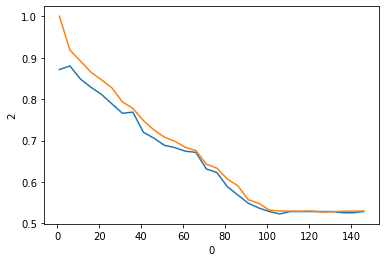

In [89]:
sns.lineplot(y=1,x=0,data=res_df)
sns.lineplot(y=2,x=0,data=res_df)

<b>Observation::</b> Since this is an toy data set we were expecting non-ideal results.   But we can see that for k=1 on train det we have no error so in short we are overfitting